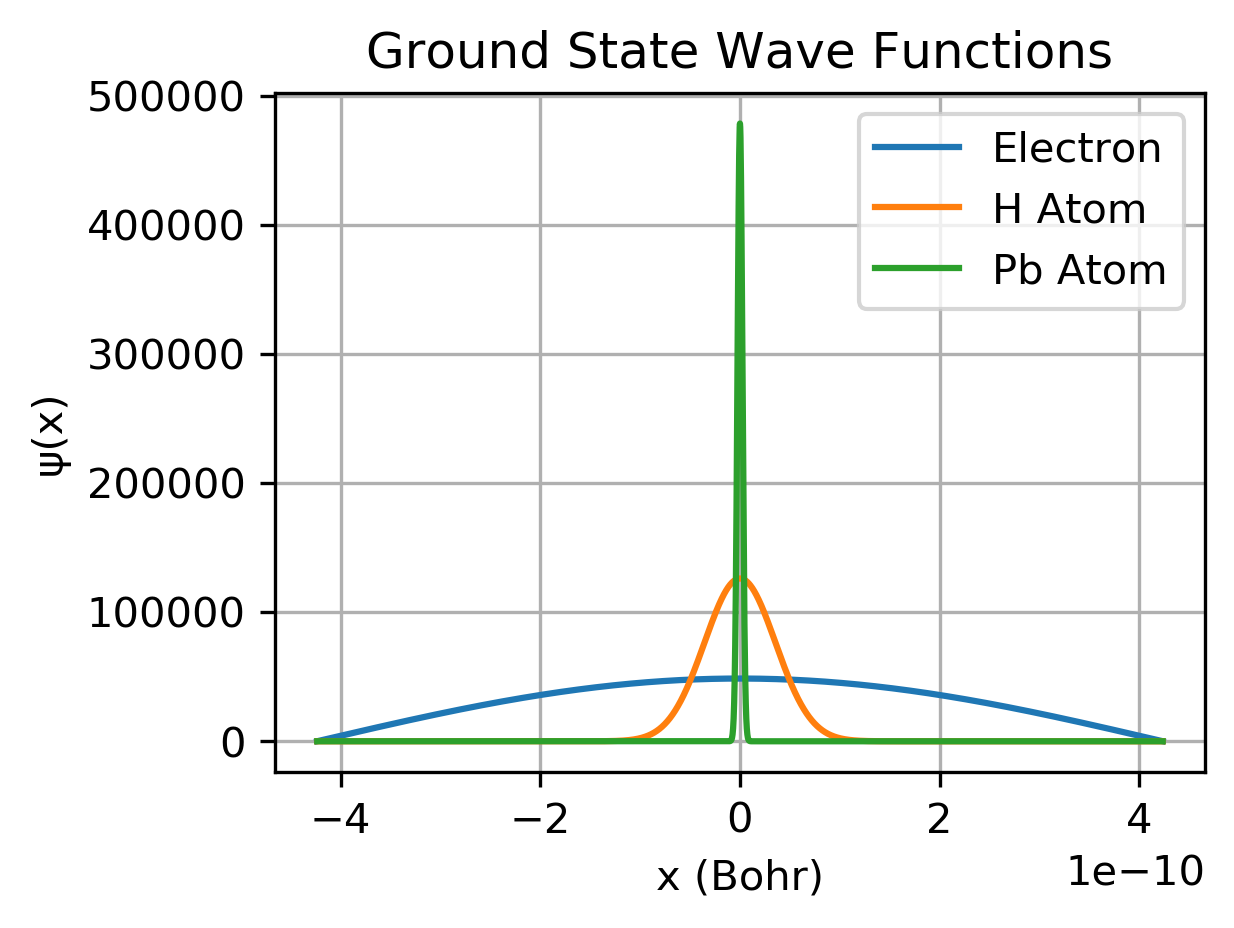

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import hbar, m_e, physical_constants
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Bohr
bohr = 5.29177e-11 # in meters
x = 8 * bohr
dx = 5e-3 * bohr
x = np.arange(-x, x+dx, dx)
omega = 5.0e13

#Pb atom
m_Pb = 207 * physical_constants['proton mass'][0]
m_H=1 * physical_constants['proton mass'][0]


#potential
V_e = 0.5 * m_e * omega ** 2 * x**2
V_Pb = 0.5 * m_Pb * omega ** 2 * x**2
V_H=0.5*m_H * omega ** 2 * x**2

# Constructing the Hamiltonian
def Hamilt(m,V):
    mu=-1*hbar**2/(2*m*dx**2)
    H_diag=np.diag(V+(-2)*mu*np.ones_like(x))
    H_diag_up=H_diag+np.diag(mu*np.ones_like(x[:-1]), k=1)
    H_diag_up_down=H_diag_up+np.diag(mu*np.ones_like(x[:-1]), k=-1)
#     #Change the last element's value of the first low to be mu
#     H_diag_up_down[0][-1]=mu
#     #Change the last element's value of the first column to be mu
#     H_diag_up_down[-1][0]=mu
    
    return H_diag_up_down

E_e, psi_e = eigh(Hamilt(m_e, V_e))
E_H, psi_H = eigh(Hamilt(m_H, V_H))
E_Pb, psi_Pb = eigh(Hamilt(m_Pb, V_Pb))

psi_e[:, 0] /= np.sqrt(np.sum(np.abs(psi_e[:, 0])**2) * dx)
psi_Pb[:, 0] /= np.sqrt(np.sum(np.abs(psi_Pb[:, 0])**2) * dx )
psi_H[:,0] /=  np.sqrt(np.sum(np.abs(psi_H[:, 0])**2) * dx)

plt.figure(figsize=(4,3), dpi=300)
plt.plot(x, psi_e[:, 0], label='Electron')
plt.plot(x, psi_H[:, 0], label='H Atom')
plt.plot(x, psi_Pb[:, 0], label='Pb Atom')
plt.xlabel('x (Bohr)')
plt.ylabel('ψ(x)')
plt.title('Ground State Wave Functions')
# plt.xlim(-6*bohr,6*bohr)
# plt.ylim(0,6.0e5)
plt.grid(True)
plt.legend()
plt.show()
